In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("hotel_bookings - hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3.0,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


## checking missing values

In [15]:

missing_values = df.isnull().sum()
missing_values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [7]:
df.drop(columns=['company'], inplace=True)

In [8]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                1
children                              4
babies                                0
meal                                  0
country                             507
market_segment                        2
distribution_channel                  1
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       0
deposit_type                         21
agent                             16340
days_in_waiting_list                  0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119389 non-null  float64
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## filling missing values

In [16]:

df['children'].fillna(df['children'].median(), inplace=True)
df['adults'].fillna(df['adults'].median(), inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['market_segment'].fillna(df['market_segment'].mode()[0],inplace=True)
df['distribution_channel'].fillna(df['distribution_channel'].mode()[0],inplace=True)
df['reserved_room_type'].fillna(df['reserved_room_type'].mode()[0],inplace=True)
df['assigned_room_type'].fillna(df['assigned_room_type'].mode()[0],inplace=True)
df['deposit_type'].fillna(df['deposit_type'].mode()[0],inplace=True)
df['agent'].fillna(df['agent'].median(), inplace=True)
df['customer_type'].fillna(df['customer_type'].mode()[0],inplace=True)
df['reservation_status'].fillna(df['reservation_status'].mode()[0],inplace=True)

In [17]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

## Convert reservation_status_date to datetime

In [18]:

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

In [19]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,3,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,4,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,0,No Deposit,14.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3.0,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Calculate summary statistics (mean, median, mode, standard deviation, etc.) for numerical columns like lead_time, stays_in_weekend_nights,
## stays_in_week_nights, adults, children, babies, previous_cancellations, previous_bookings_not_canceled, days_in_waiting_list, adr,
## required_car_parking_spaces, and total_of_special_requests.

## Summary statistics for numerical columns

In [22]:

numerical_columns = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
    'adults', 'children', 'babies', 'previous_cancellations', 
    'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 
    'required_car_parking_spaces', 'total_of_special_requests'
]
summary_stats = df[numerical_columns].describe()
summary_stats



,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,391.000000,5400.000000,8.000000,5.000000


## Calculate mode for each numerical column

In [23]:

mode_stats = df[numerical_columns].mode().iloc[0]
mode_stats

lead_time                          0.0
stays_in_weekend_nights            0.0
stays_in_week_nights               2.0
adults                             2.0
children                           0.0
babies                             0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
days_in_waiting_list               0.0
adr                               62.0
required_car_parking_spaces        0.0
total_of_special_requests          0.0
Name: 0, dtype: float64

## Display value counts and frequencies for categorical columns like hotel, country, market_segment, distribution_channel, is_repeated_guest, reserved_room_type,
## assigned_room_type, deposit_type, agent, company, customer_type, reservation_status.

In [29]:

categorical_columns = [
    'hotel', 'country', 'market_segment', 'distribution_channel',
    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'agent', 'customer_type', 'reservation_status'
]

for column in categorical_columns:
    print(f"\nValue Counts for {column}:\n{df[column].value_counts()}\n")


Value Counts for hotel:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


Value Counts for country:
country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64


Value Counts for market_segment:
market_segment
Online TA        56479
Offline TA/TO    24217
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64


Value Counts for distribution_channel:
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64


Value Counts for is_repeated_guest:
is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64


Value Counts for reserved_room_type:
reserved_room_type
A    85995
D    19200
E     6535
F     2897
G     2094
B     1118
C      9

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

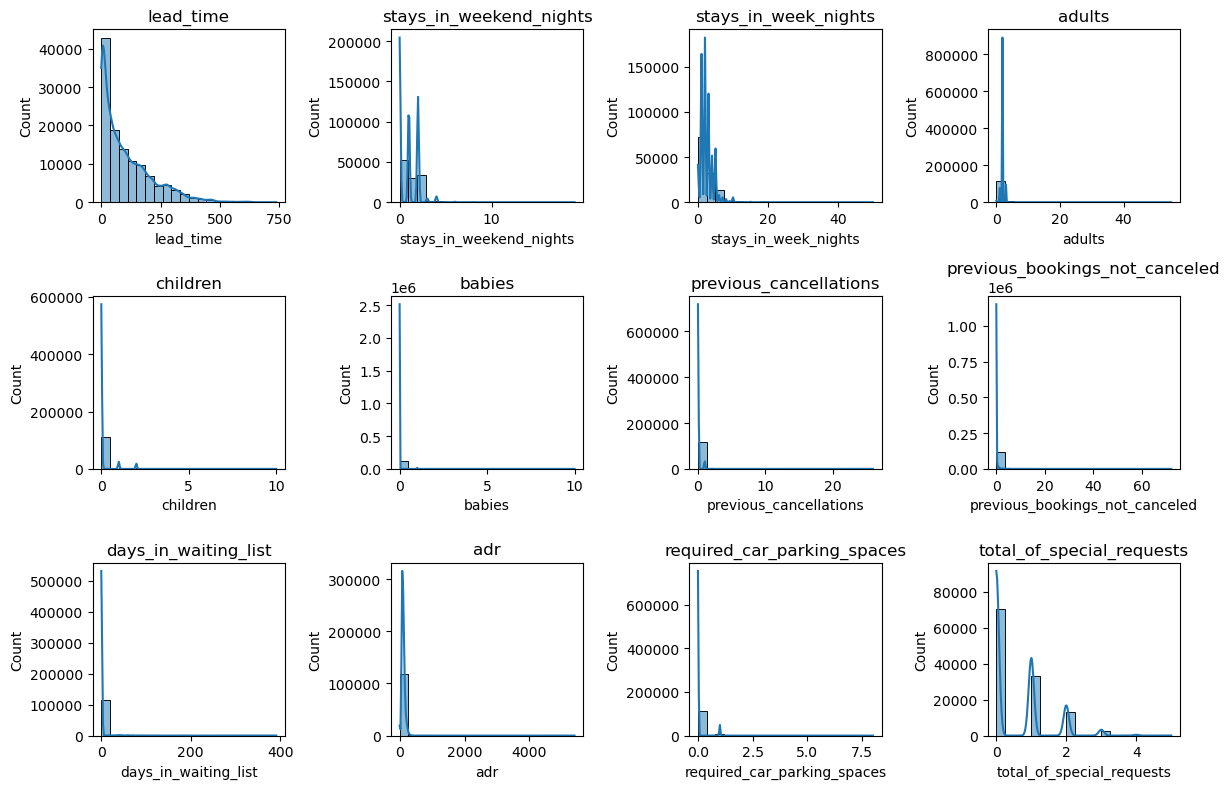

In [30]:
# List of numerical columns for visualization
numerical_columns = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
    'adults', 'children', 'babies', 'previous_cancellations', 
    'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 
    'required_car_parking_spaces', 'total_of_special_requests'
]
# Plot histograms for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Plot box plots for numerical columns

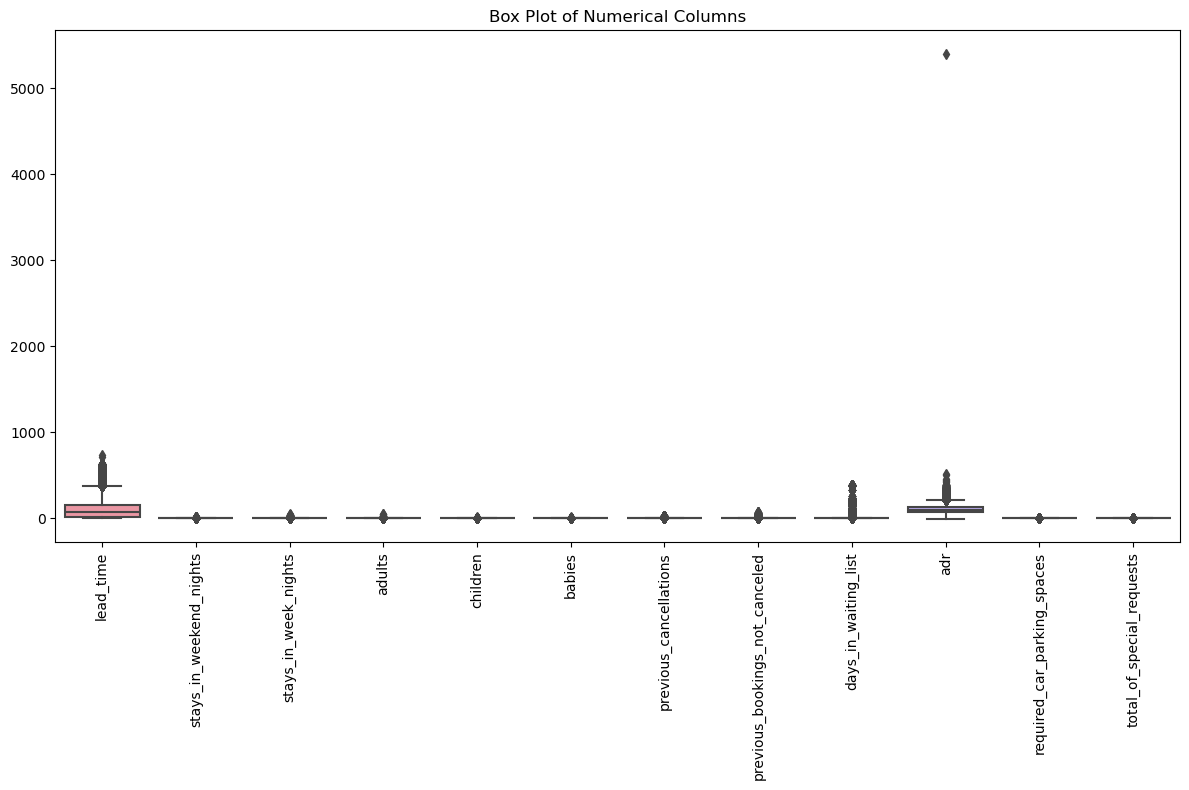

In [31]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

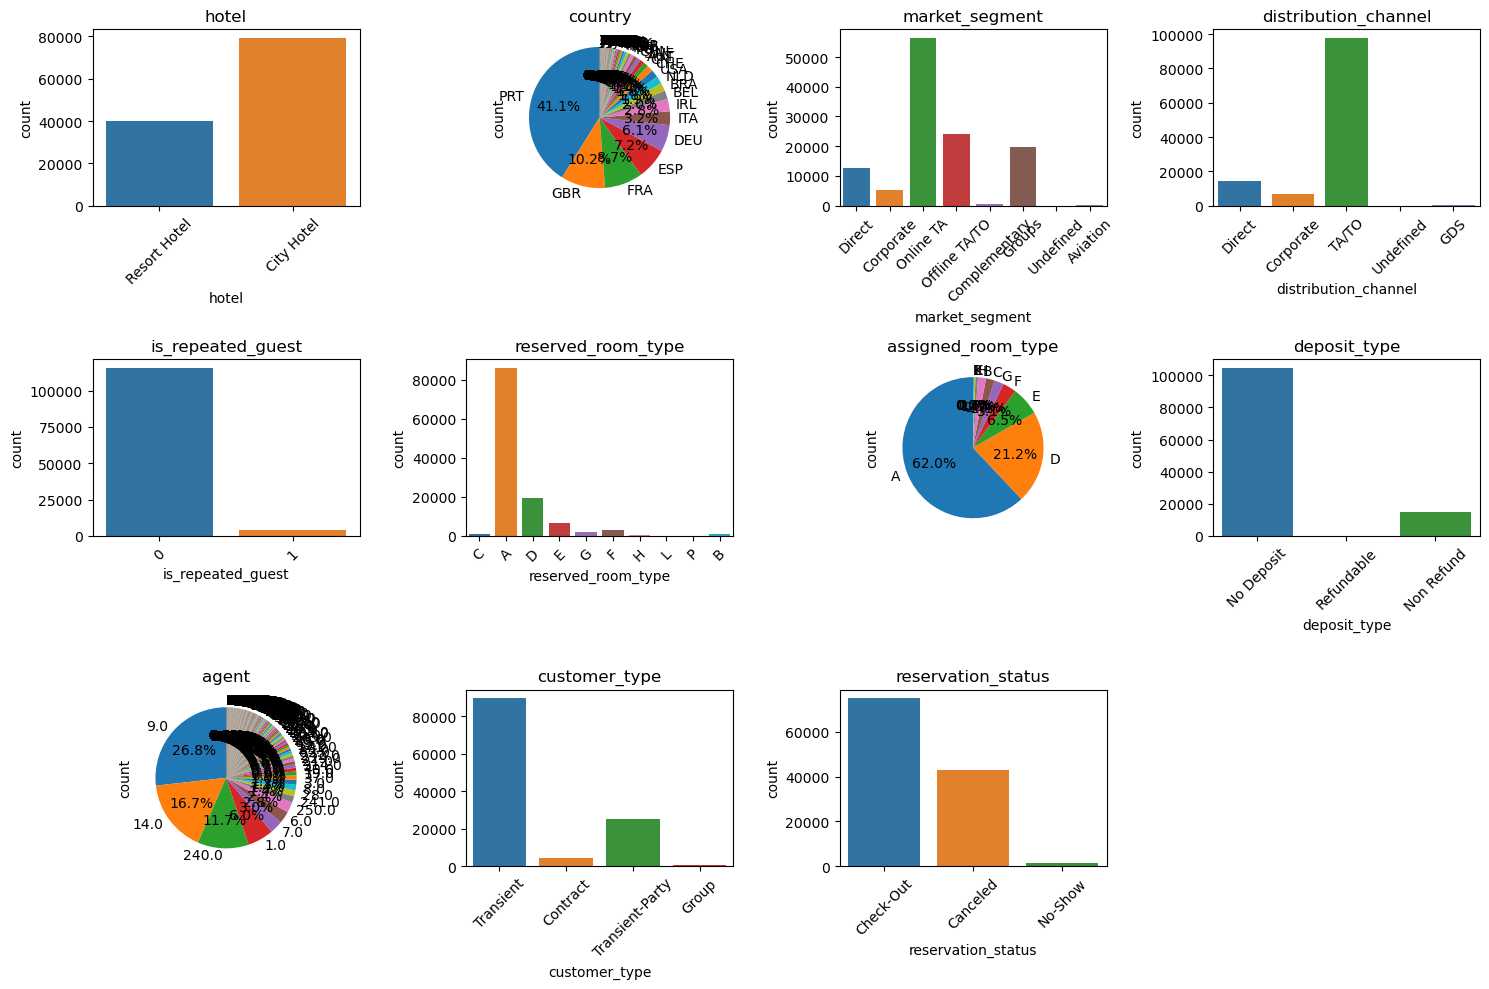

In [33]:
# List of categorical columns
categorical_columns = [
    'hotel', 'country', 'market_segment', 'distribution_channel',
    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'agent', 'customer_type', 'reservation_status'
]
# Plot bar plots or pie charts for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    if len(df[col].value_counts()) <= 10:  # Bar plot if fewer categories
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=45)
    else:  # Pie chart if many categories
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(col)
plt.tight_layout()
plt.show()

## Plot scatter plots for relationships between numerical columns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1200x800 with 0 Axes>

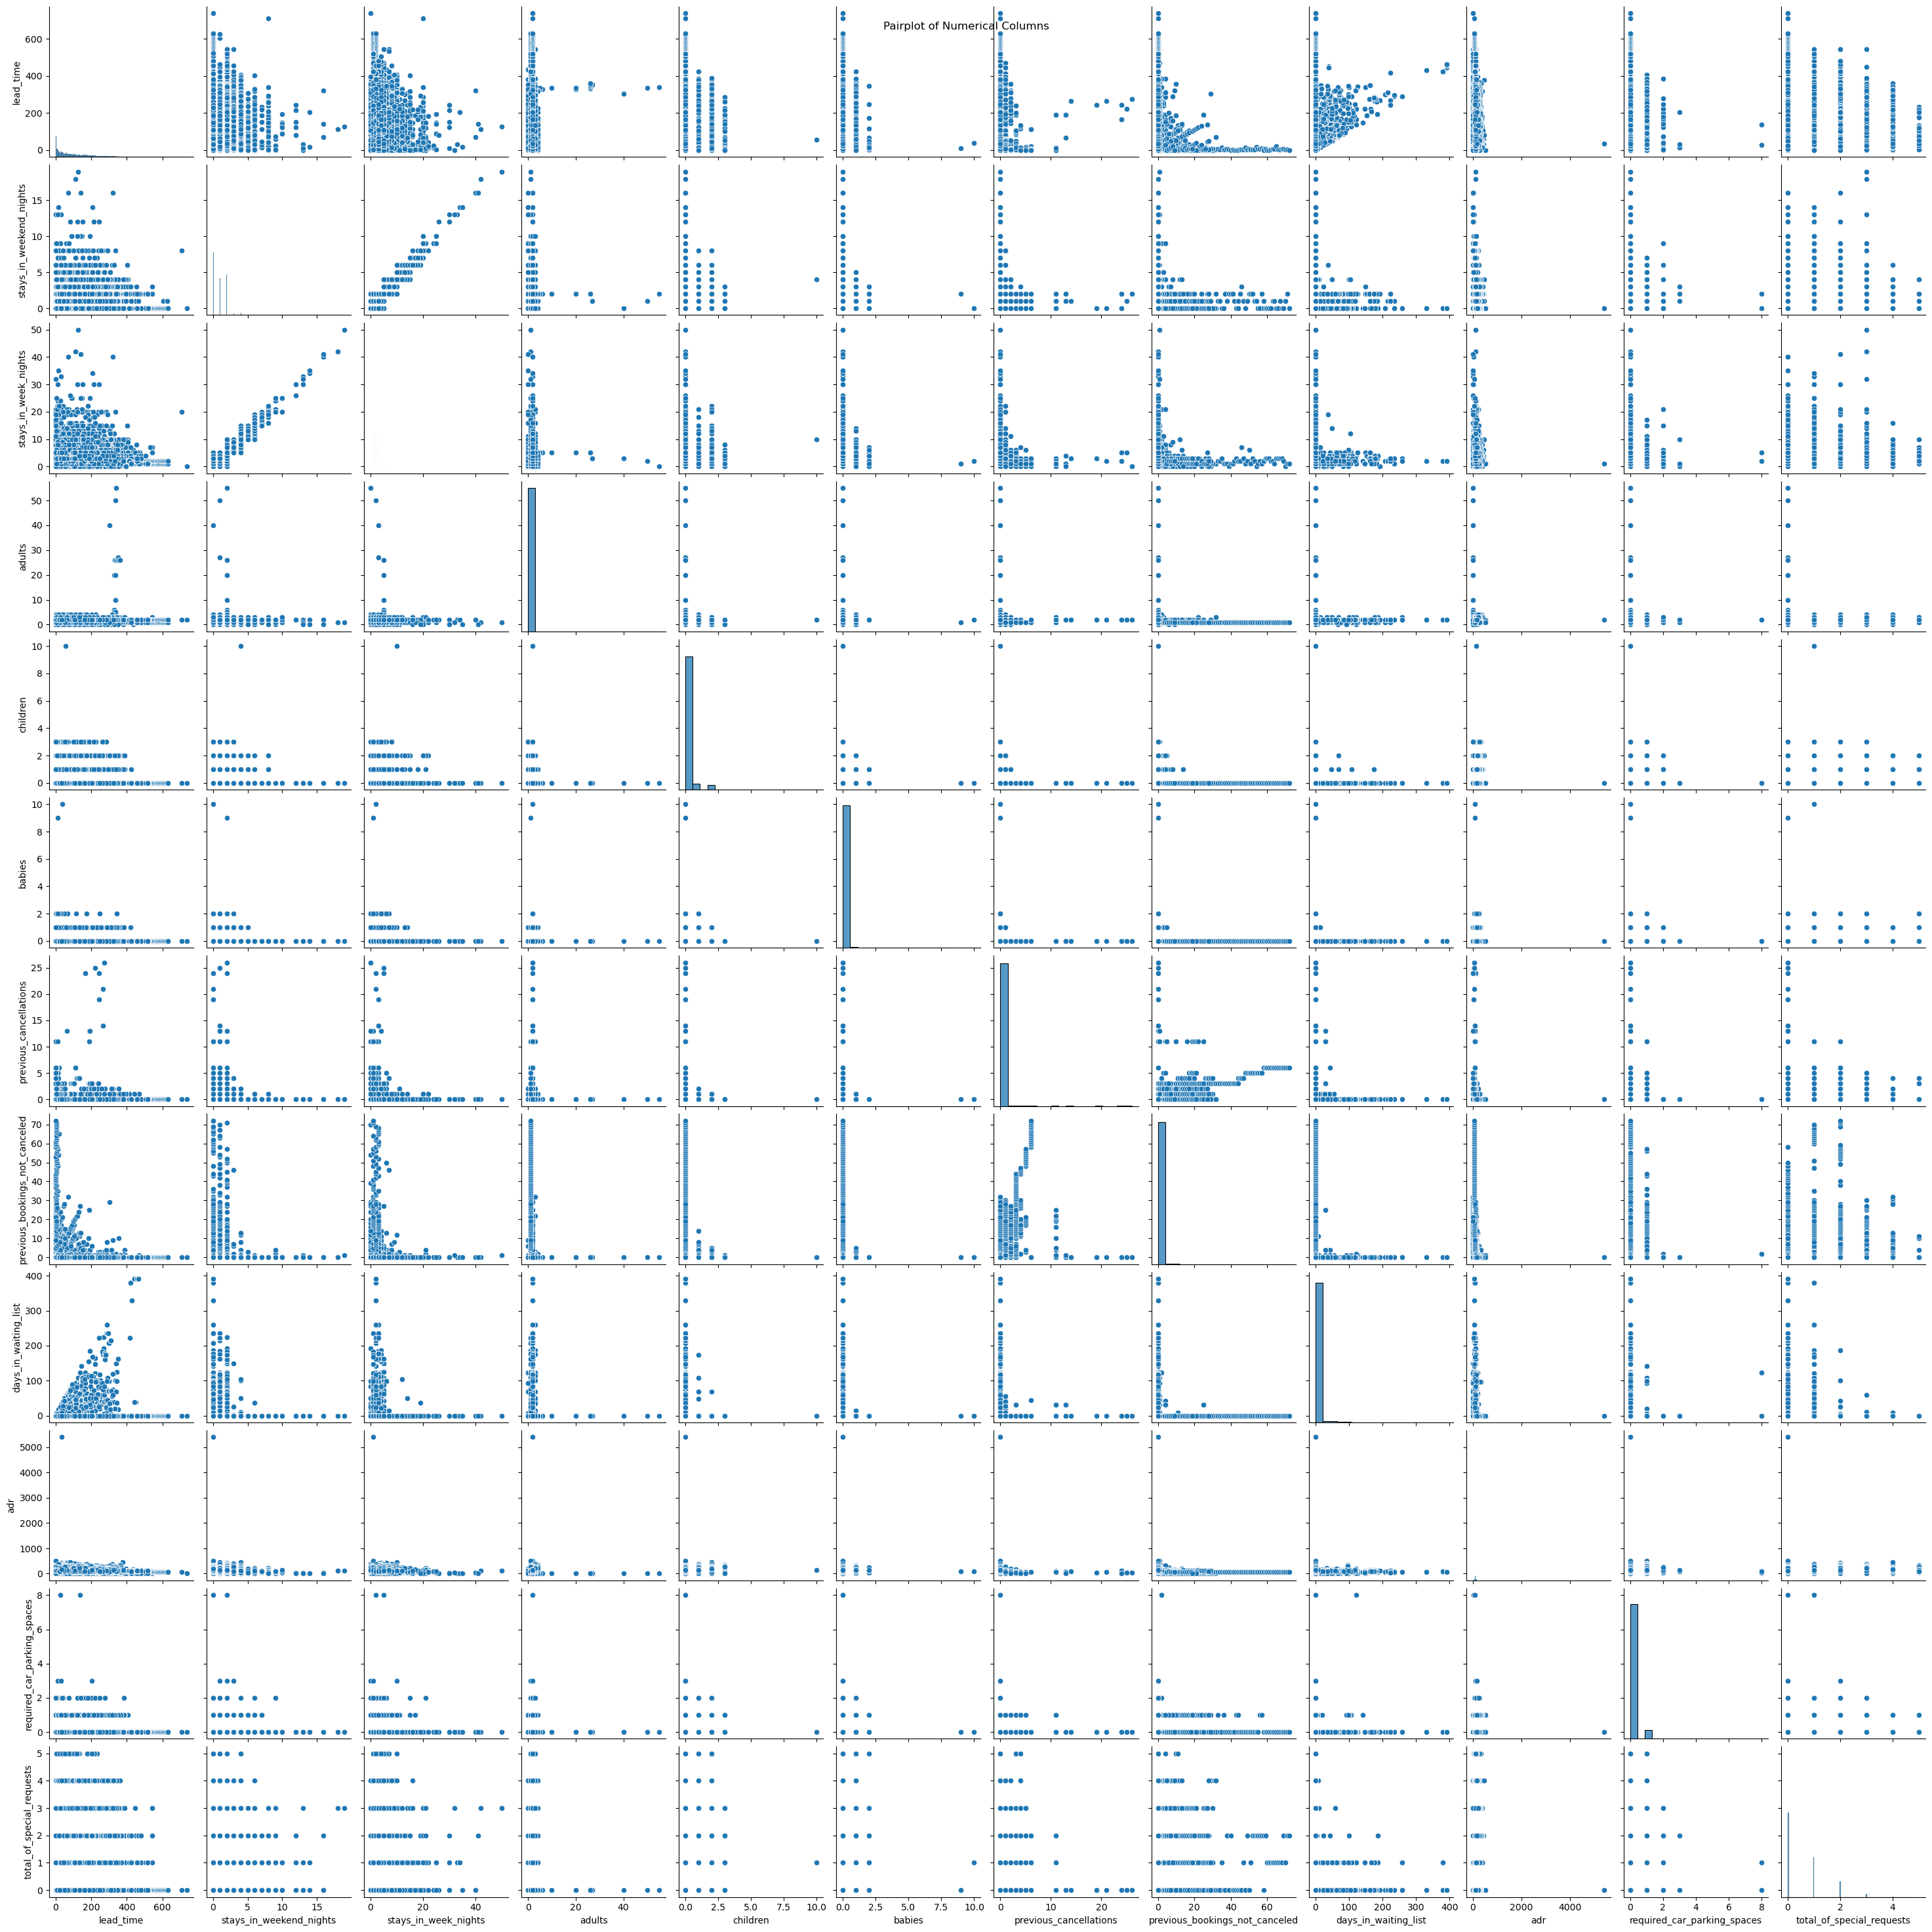

In [35]:

plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

## Line plot for trends over time

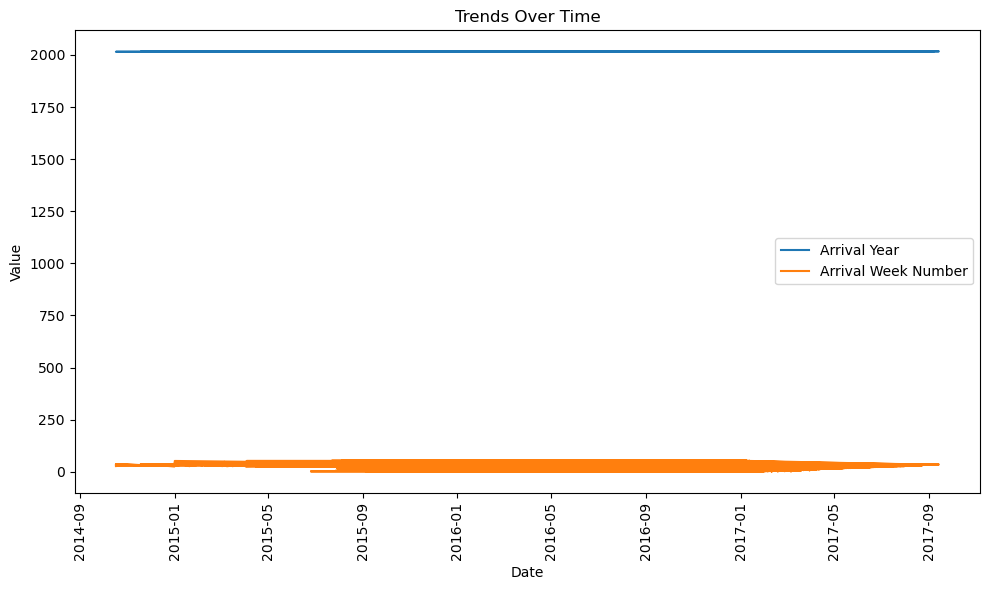

In [36]:

plt.figure(figsize=(10, 6))
plt.plot(df['reservation_status_date'], df['arrival_date_year'], label='Arrival Year')
plt.plot(df['reservation_status_date'], df['arrival_date_week_number'], label='Arrival Week Number')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trends Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Calculate the correlation matrix

In [37]:

correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.085671,0.165799,0.119519,-0.037613,-0.020915,0.086042,-0.073548,0.170084,-0.063077,-0.116451,-0.095712
stays_in_weekend_nights,0.085671,1.000000,0.498969,0.091871,0.045794,0.018483,-0.012775,-0.042715,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.165799,0.498969,1.000000,0.092976,0.044203,0.020191,-0.013992,-0.048743,-0.002020,0.065237,-0.024859,0.068192
adults,0.119519,0.091871,0.092976,1.000000,0.030440,0.018146,-0.006738,-0.107983,-0.008283,0.230641,0.014785,0.122884
children,-0.037613,0.045794,0.044203,0.030440,1.000000,0.024030,-0.024729,-0.021072,-0.033271,0.324853,0.056255,0.081736
babies,-0.020915,0.018483,0.020191,0.018146,0.024030,1.000000,-0.007501,-0.006550,-0.010621,0.029186,0.037383,0.097889
previous_cancellations,0.086042,-0.012775,-0.013992,-0.006738,-0.024729,-0.007501,1.000000,0.152728,0.005929,-0.065646,-0.018492,-0.048384
previous_bookings_not_canceled,-0.073548,-0.042715,-0.048743,-0.107983,-0.021072,-0.006550,0.152728,1.000000,-0.009397,-0.072144,0.047653,0.037824
days_in_waiting_list,0.170084,-0.054151,-0.002020,-0.008283,-0.033271,-0.010621,0.005929,-0.009397,1.000000,-0.040756,-0.030600,-0.082730
adr,-0.063077,0.049342,0.065237,0.230641,0.324853,0.029186,-0.065646,-0.072144,-0.040756,1.000000,0.056628,0.172185


## Plotting the heatmap

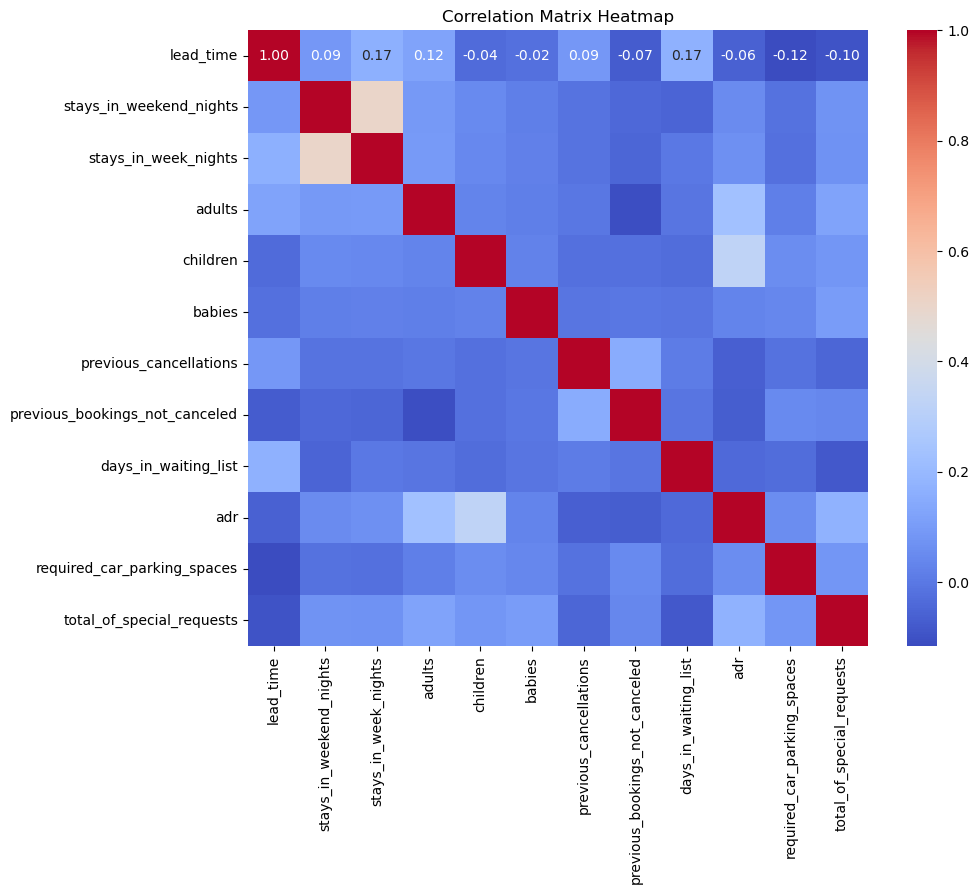

In [38]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Perform one-hot encoding using pandas' get_dummies function

In [39]:

df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent_527.0,agent_531.0,agent_535.0,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,July,27,1,0,0,2.0,0.0,...,False,False,False,False,False,True,False,False,True,False
1,0,737,2015,July,27,1,0,0,2.0,0.0,...,False,False,False,False,False,True,False,False,True,False
2,0,7,2015,July,27,1,0,1,1.0,0.0,...,False,False,False,False,False,True,False,False,True,False
3,0,13,2015,July,27,1,0,1,1.0,0.0,...,False,False,False,False,False,True,False,False,True,False
4,0,14,2015,July,27,1,0,2,2.0,0.0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2.0,0.0,...,False,False,False,False,False,True,False,False,True,False
119386,0,102,2017,August,35,31,2,5,3.0,0.0,...,False,False,False,False,False,True,False,False,True,False
119387,0,34,2017,August,35,31,2,5,2.0,0.0,...,False,False,False,False,False,True,False,False,True,False
119388,0,109,2017,August,35,31,2,5,2.0,0.0,...,False,False,False,False,False,True,False,False,True,False


In [40]:
hotel_counts = df['hotel'].value_counts()
hotel_counts

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

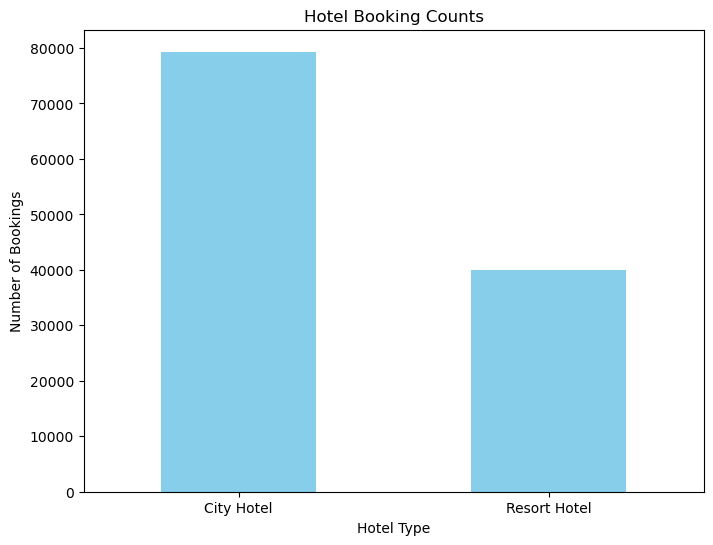

In [41]:
plt.figure(figsize=(8, 6))
hotel_counts.plot(kind='bar', color='skyblue')
plt.title('Hotel Booking Counts')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()

In [42]:
country_counts = df['country'].value_counts()
country_counts

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

## Visualize the distribution using a pie chart

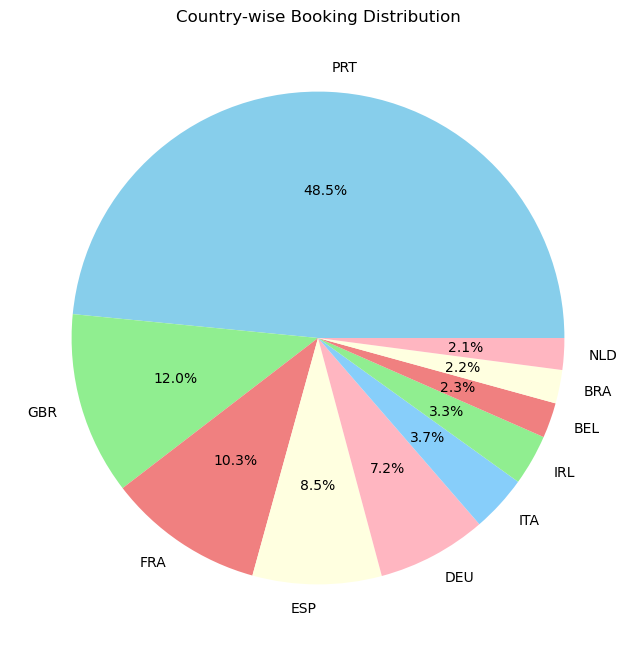

In [43]:

plt.figure(figsize=(10, 8))
country_counts.head(10).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])
plt.title('Country-wise Booking Distribution')
plt.ylabel('')
plt.show()

## Count the number of bookings for each market segment and distribution channel

In [44]:

segment_counts = df['market_segment'].value_counts()
channel_counts = df['distribution_channel'].value_counts()


## Visualize the distribution using bar plots

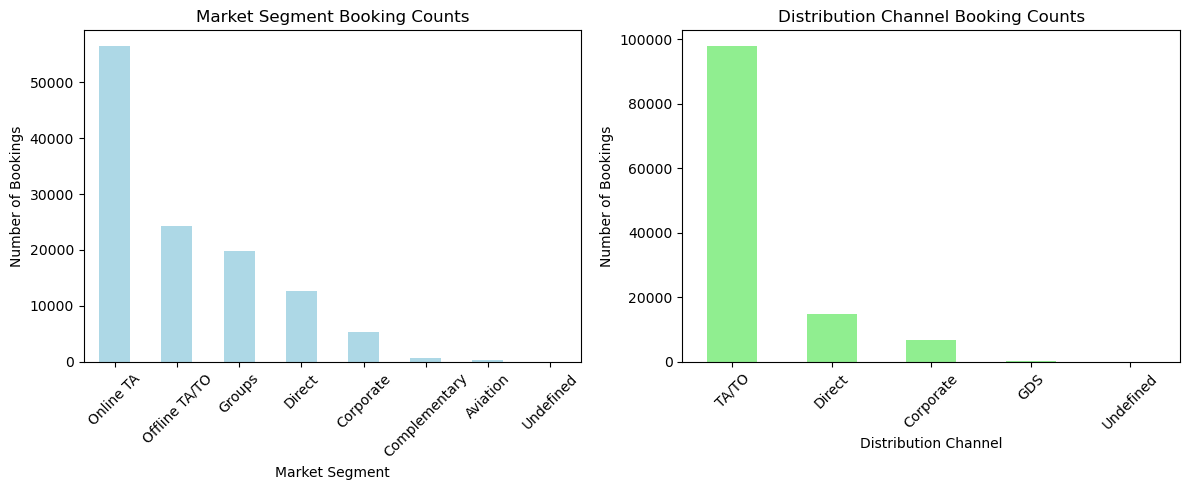

In [45]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
segment_counts.plot(kind='bar', color='lightblue')
plt.title('Market Segment Booking Counts')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
channel_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution Channel Booking Counts')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Count the number of bookings for each room type and deposit type

In [46]:

reserved_room_counts = df['reserved_room_type'].value_counts()
assigned_room_counts = df['assigned_room_type'].value_counts()
deposit_counts = df['deposit_type'].value_counts()

## Visualize the distribution using bar plots

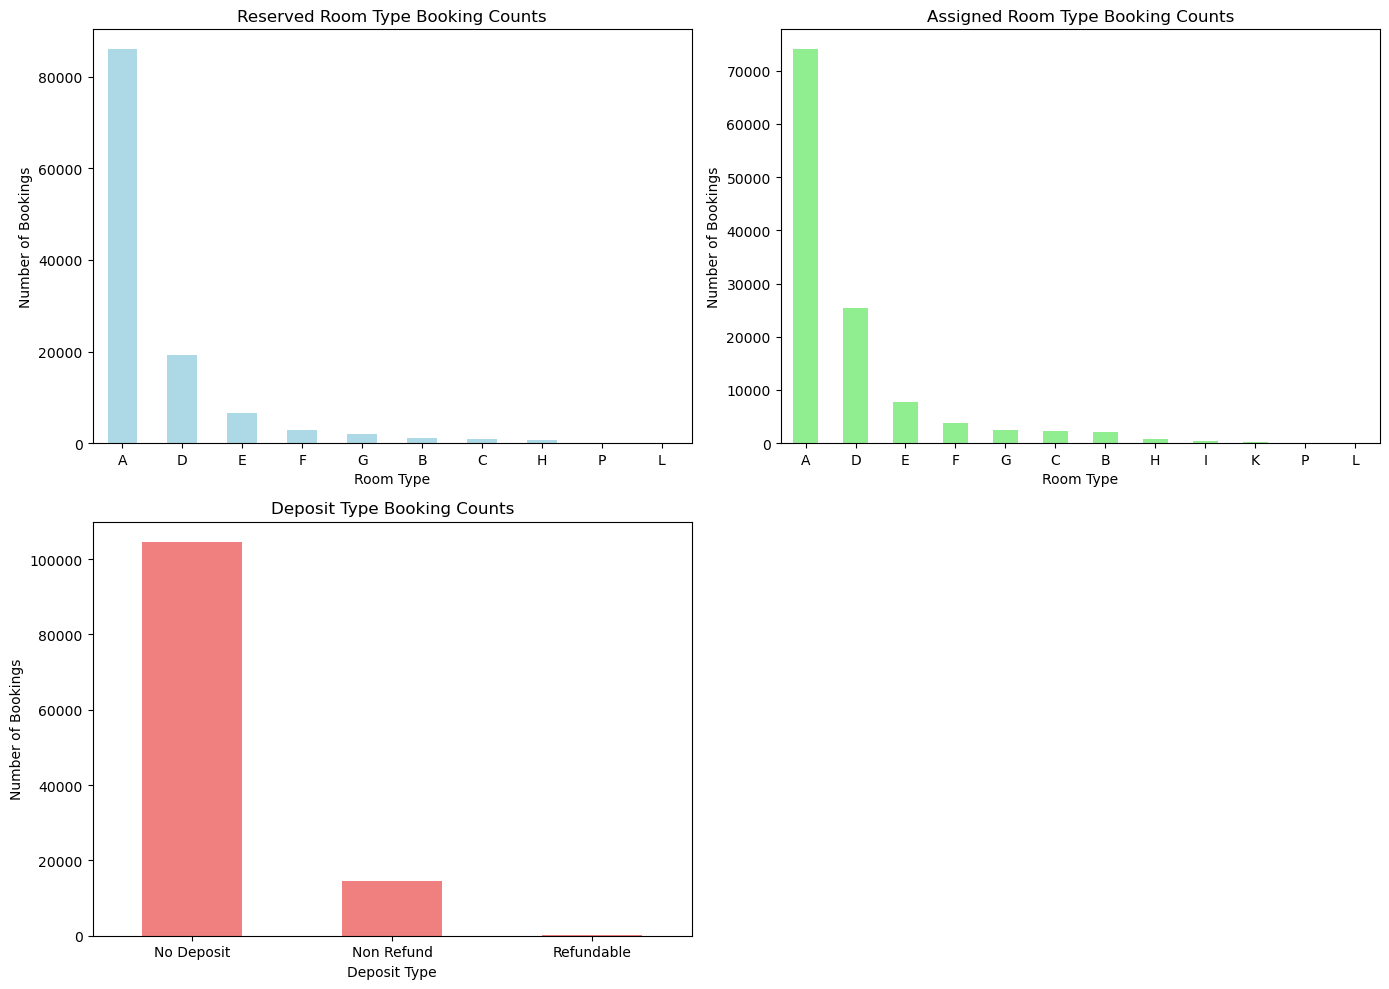

In [48]:

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
reserved_room_counts.plot(kind='bar', color='lightblue')
plt.title('Reserved Room Type Booking Counts')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)

plt.subplot(2, 2, 2)
assigned_room_counts.plot(kind='bar', color='lightgreen')
plt.title('Assigned Room Type Booking Counts')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)

plt.subplot(2, 2, 3)
deposit_counts.plot(kind='bar', color='lightcoral')
plt.title('Deposit Type Booking Counts')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [49]:
year_counts = df['arrival_date_year'].value_counts().sort_index()

## Visualize the distribution using a line plot

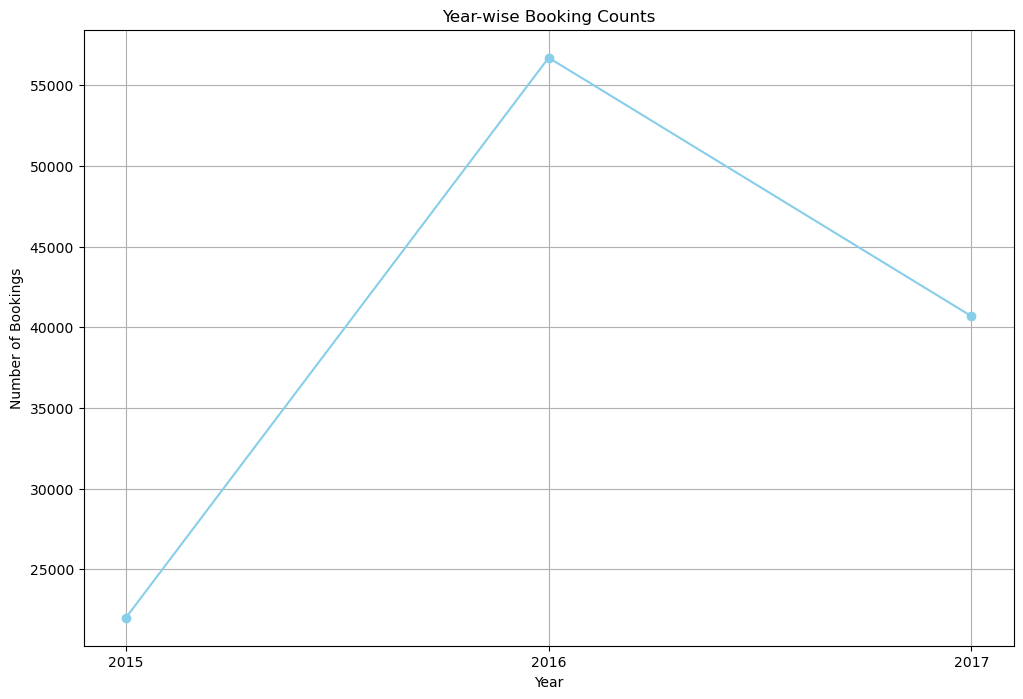

In [50]:

plt.figure(figsize=(12, 8))
year_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Year-wise Booking Counts')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.xticks(year_counts.index)
plt.grid(True)
plt.show()

## Count the number of bookings for each month

In [54]:

month_counts = df['arrival_date_month'].value_counts().sort_index()

## Visualize the distribution using a bar plot

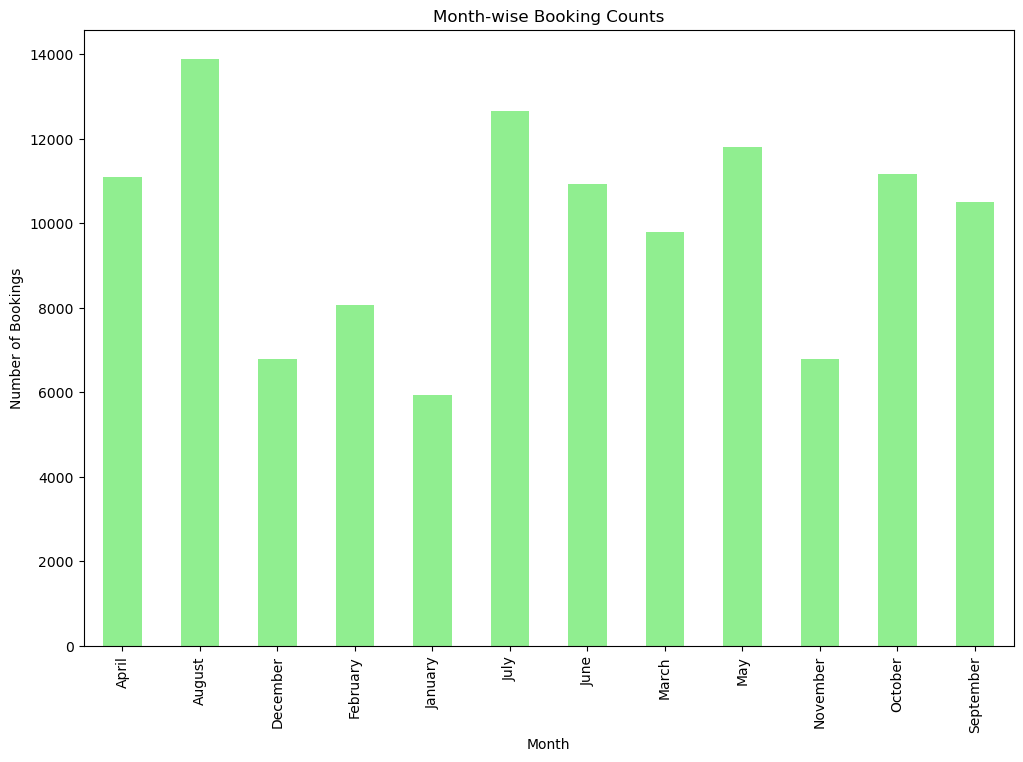

In [55]:

plt.figure(figsize=(12, 8))
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Month-wise Booking Counts')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.show()

## Count the number of bookings for each week number

In [57]:

week_counts = df['arrival_date_week_number'].value_counts().sort_index()


## Visualize the distribution using a line plot

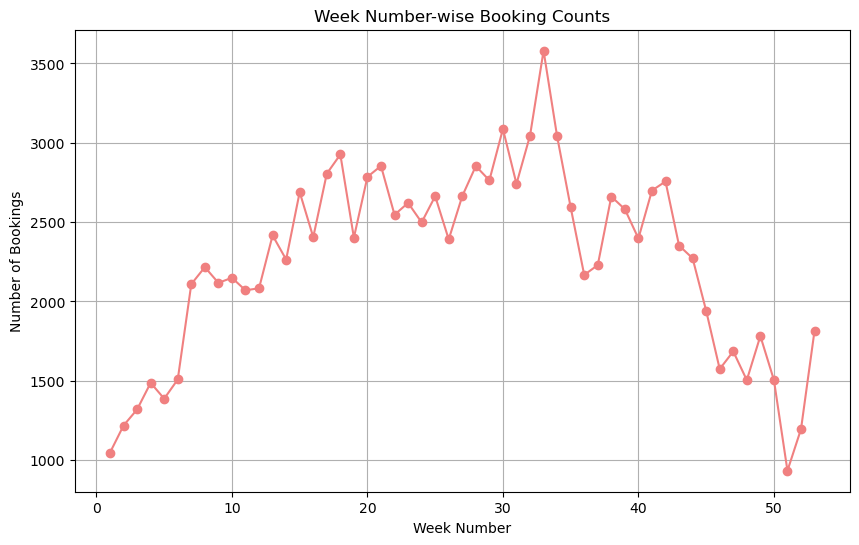

In [58]:

plt.figure(figsize=(10, 6))
week_counts.plot(kind='line', marker='o', color='lightcoral')
plt.title('Week Number-wise Booking Counts')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

## Count the number of bookings for each day of the month

In [59]:

day_counts = df['arrival_date_day_of_month'].value_counts().sort_index()


# Visualize the distribution using a line plot

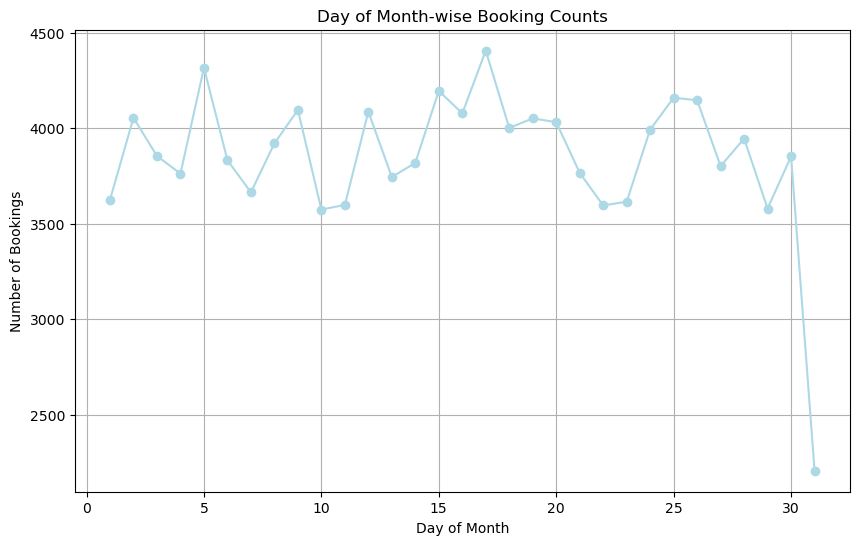

In [60]:

plt.figure(figsize=(10, 6))
day_counts.plot(kind='line', marker='o', color='lightblue')
plt.title('Day of Month-wise Booking Counts')
plt.xlabel('Day of Month')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

## Combine year, month, and day columns to create a datetime column

In [62]:


df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), errors='coerce')



## Count the number of bookings for each date

In [63]:
date_counts = df['arrival_date'].value_counts().sort_index()

## Visualize the distribution using a line plot

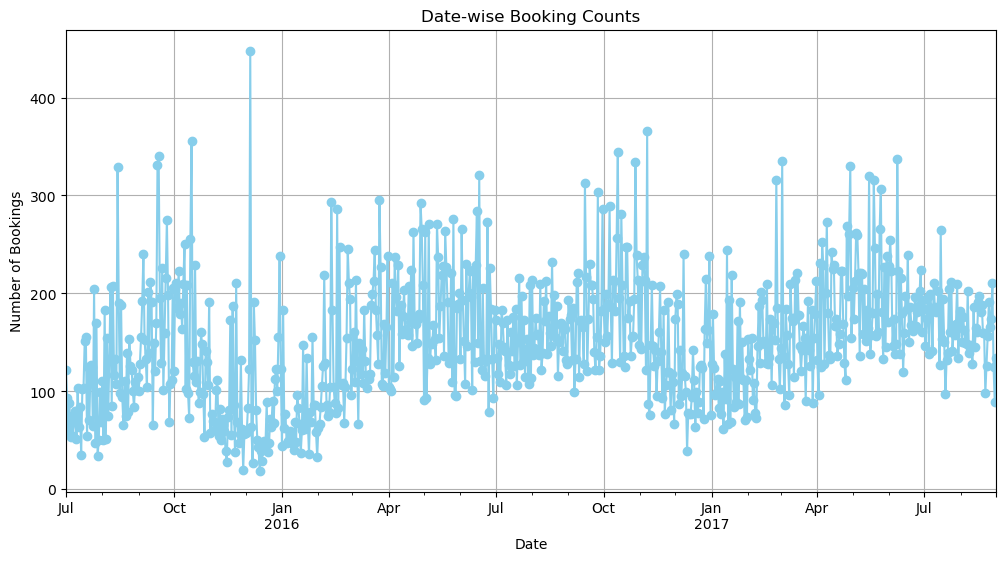

In [64]:

plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Date-wise Booking Counts')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()


## Combine year, month, and day columns to create a datetime column

In [65]:

df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), errors='coerce')



## Count the number of bookings for each date

In [66]:
date_counts = df['arrival_date'].value_counts().sort_index()

## Visualize the distribution using a line plot

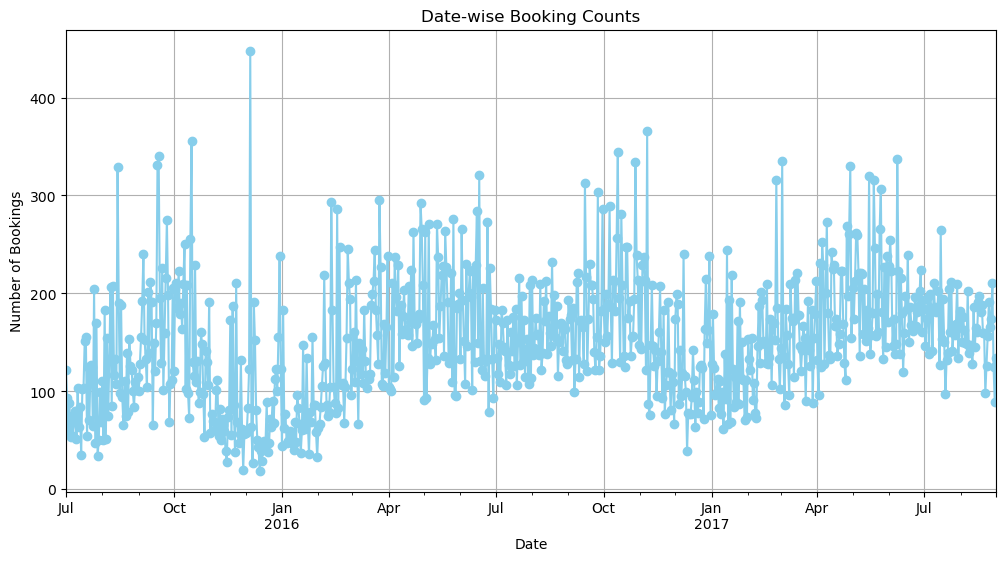

In [68]:

plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Date-wise Booking Counts')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

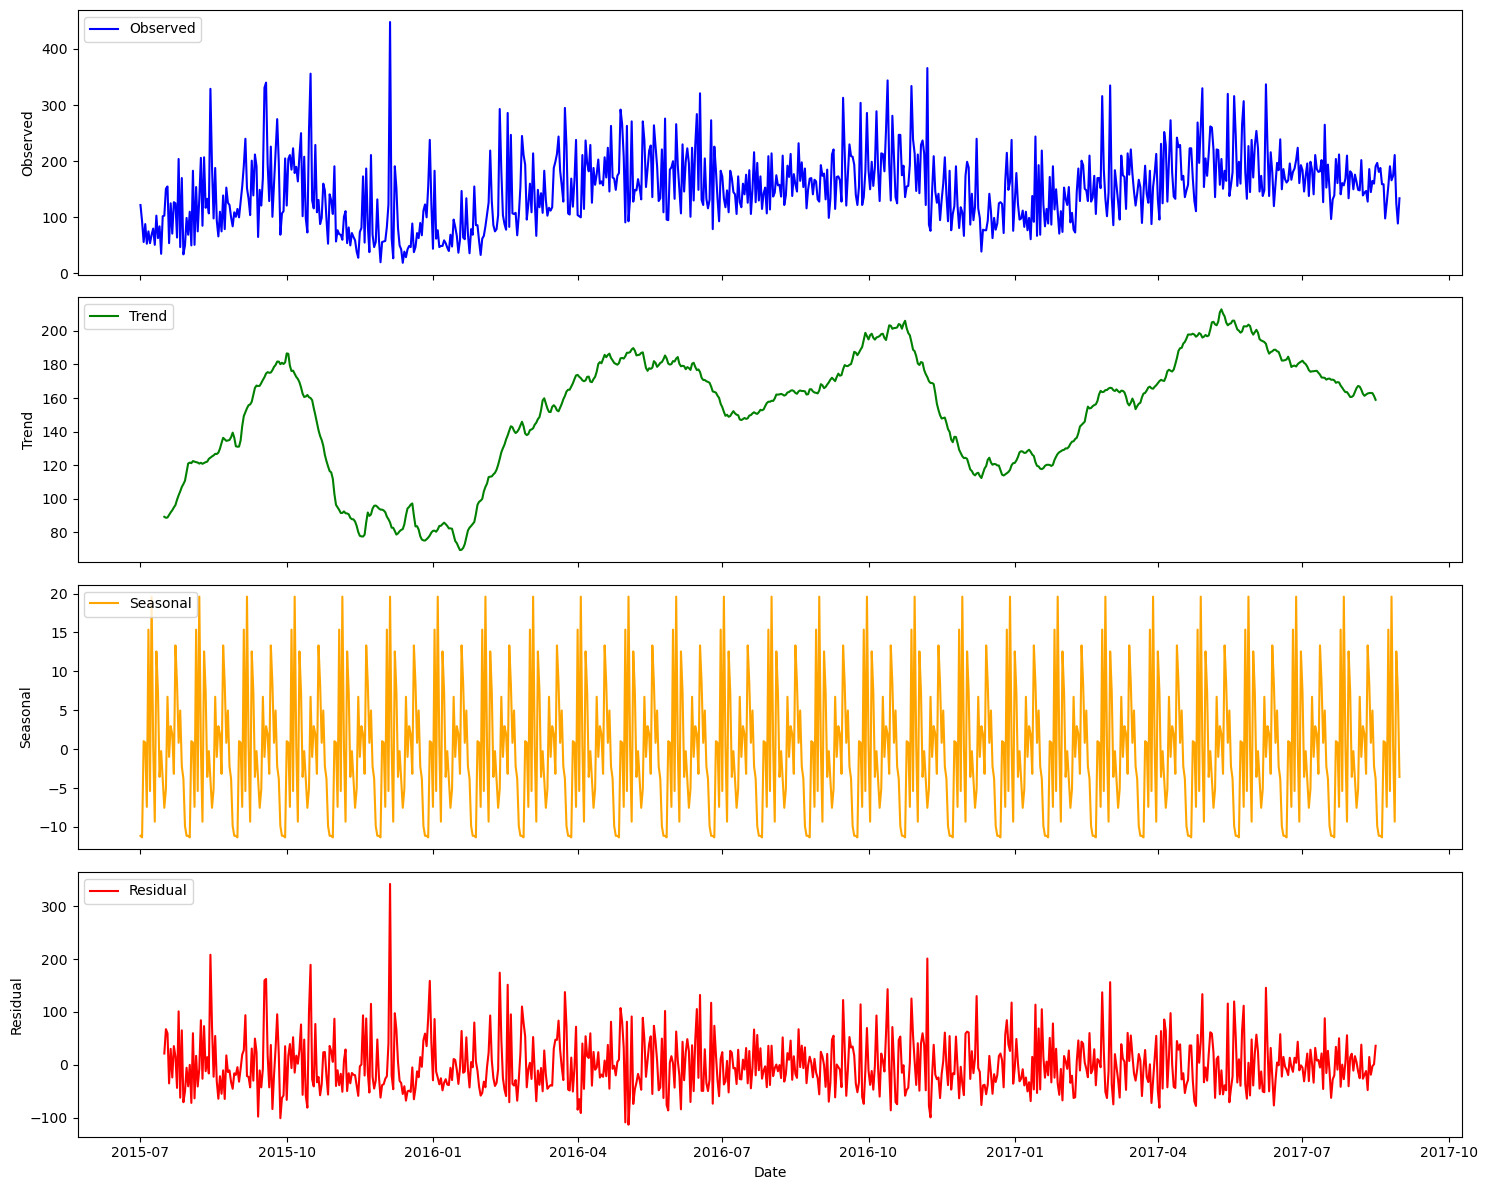

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(date_counts, model='additive', period=30)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

ax1.plot(decomposition.observed, label='Observed', color='blue')
ax1.legend(loc='upper left')
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend, label='Trend', color='green')
ax2.legend(loc='upper left')
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal, label='Seasonal', color='orange')
ax3.legend(loc='upper left')
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid, label='Residual', color='red')
ax4.legend(loc='upper left')
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Create new features

In [70]:

df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['has_special_requests'] = df['total_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)
df['has_booking_changes'] = df['booking_changes'].apply(lambda x: 1 if x > 0 else 0)


In [71]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stay_nights,total_guests,has_special_requests,has_booking_changes
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2.0,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2.0,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2.0,1,0


In [72]:
# Convert month names to numerical values
month_to_num = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_date_month_num'] = df['arrival_date_month'].map(month_to_num)

# Create a single arrival date column by concatenating the components
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month_num'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str))

# Extract season
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['arrival_date'].apply(get_season)

# Extract month name
df['month_name'] = df['arrival_date'].dt.month_name()

# Extract day of the week
df['day_of_week'] = df['arrival_date'].dt.day_name()

In [73]:
print(df[['arrival_date', 'season', 'month_name', 'day_of_week']])

       arrival_date  season month_name day_of_week
0        2015-07-01  Summer       July   Wednesday
1        2015-07-01  Summer       July   Wednesday
2        2015-07-01  Summer       July   Wednesday
3        2015-07-01  Summer       July   Wednesday
4        2015-07-01  Summer       July   Wednesday
...             ...     ...        ...         ...
119385   2017-08-30  Summer     August   Wednesday
119386   2017-08-31  Summer     August    Thursday
119387   2017-08-31  Summer     August    Thursday
119388   2017-08-31  Summer     August    Thursday
119389   2017-08-29  Summer     August     Tuesday

[119390 rows x 4 columns]


In [74]:
## Extract additional features from the datetime column, such as day of the week, month, or hour.

# Extract additional features from reservation_status_date
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_day'] = df['reservation_status_date'].dt.day
df['reservation_day_of_week'] = df['reservation_status_date'].dt.dayofweek
df['reservation_week_of_year'] = df['reservation_status_date'].dt.isocalendar().week

# Display the updated DataFrame with new features
print(df[['reservation_status_date', 'reservation_year', 'reservation_month', 'reservation_day', 'reservation_day_of_week', 'reservation_week_of_year']])

       reservation_status_date  reservation_year  reservation_month  \
0                   2015-07-01              2015                  7   
1                   2015-07-01              2015                  7   
2                   2015-07-02              2015                  7   
3                   2015-07-02              2015                  7   
4                   2015-07-03              2015                  7   
...                        ...               ...                ...   
119385              2017-09-06              2017                  9   
119386              2017-09-07              2017                  9   
119387              2017-09-07              2017                  9   
119388              2017-09-07              2017                  9   
119389              2017-09-07              2017                  9   

        reservation_day  reservation_day_of_week  reservation_week_of_year  
0                     1                        2                      